In [2]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [3]:
data_path = "C:/Users/ufabd/Desktop/Data Science/Data Sample/redWine_datasets/winequality-red.csv"

In [4]:
data = pd.read_csv(data_path)

In [5]:
X = data.drop(['quality'], axis=1)
y = data['quality']

In [6]:
data_matrix = xgb.DMatrix(data=X, label=y)

In [10]:
params = {'objective':'reg:squarederror', 'colsample_bytree':0.3, 'learning_rate':0.1, 'max_depth':5, 'alpha':10}

In [11]:
cv_result = xgb.cv(dtrain=data_matrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics='rmse',
                  as_pandas=True, seed=123)

In [12]:
cv_result.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,4.693762,0.015115,4.693672,0.034615
1,4.239936,0.013686,4.239287,0.036642
2,3.833226,0.012571,3.832596,0.038136
3,3.468374,0.011391,3.467192,0.040211
4,3.140818,0.009582,3.140556,0.041677


In [14]:
print((cv_result["test-rmse-mean"]).tail(1))

49    0.641439
Name: test-rmse-mean, dtype: float64


In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=123)

In [18]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_valid = scaler.fit_transform(X_valid)

In [25]:
xgb_r = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)

In [26]:
xgb_r.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
preds = xgb_r.predict(X_valid)

In [28]:
rmse = np.sqrt(mean_squared_error(y_valid, preds))

In [29]:
print(f"The RMSEis: {rmse}")

The RMSEis: 1.967317050672712


In [30]:
import matplotlib.pyplot as plt

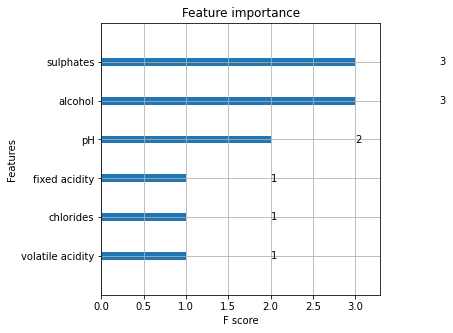

In [32]:
xgb.plot_importance(xgb_r)
plt.rcParams['figure.figsize'] = [10, 10]